In [1]:

# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.display import HTML

# personal details
first_name = "Catherine"
last_name = "Josen"
student_number = "N11883057"

personal_header = f"<h1>{first_name} {last_name} ({student_number})</h1>"
HTML(personal_header)

*We'll be analyzing unstructured information about "Government" related to an Australian production office. This data will be retrieved using an API that requires a Guardian key, and we'll focus on information starting from April 1st, 2024*

In [2]:
# Load the data - articles from The Guardian about the war in Ukraine
file_name = "wod_articles.json"

with open(f"{file_name}",'r', encoding='utf-8') as fp:
    articles = json.load(fp)

print(f"Loaded {len(articles)} articles from {file_name}")

Loaded 137 articles from wod_articles.json


*At the outset of our analysis, we shall commence by importing the requisite libraries.*

In [3]:
# Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import pandas as pd
import json
import random

/tmp/ipykernel_465/2854994355.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


*This code initializes a CountVectorizer to convert a collection of text documents (stored in articles) into a matrix of token counts, ignoring terms that appear in more than 75% or fewer than 2 documents, and limiting the vocabulary to 10,000 terms while excluding English stop words like a , an , and , the etc...* 
*The fit_transform method then learns the vocabulary dictionary and returns the term-document matrix.*

*The primary objective of this analysis is to distill and categorize the unstructured data into thematic clusters, thereby facilitating the extraction of valuable insights.*

In [4]:
# Only count terms that in maximum of 75% of documents, and a minimum of 2 documents. 
# Count a maximum of 10000 terms, and remove common english stop words
# Assuming articles_text holds a list of article strings
count_vectorizer = CountVectorizer(max_df=0.75, min_df=2, max_features=10000, stop_words="english")
count_dt_matrix = count_vectorizer.fit_transform(articles.values())


*This code extracts the feature names (terms) from the CountVectorizer and creates a new DataFrame count_df with the term-document matrix, using article titles as the index and the extracted feature names as the columns. The toarray() method converts the sparse matrix to a dense array for the DataFrame.*


*This step is important because it organizes the term-document matrix into a readable and accessible format, allowing us to easily analyze the frequency of terms across different articles and gain insights into the textual data.*

In [5]:

# Create a new dataframe with the matrix - use titles for the index and terms for the columns
feature_names = count_vectorizer.get_feature_names_out()
count_df = pd.DataFrame(count_dt_matrix.toarray(), index=articles.keys(), columns=feature_names)


*This code randomly selects 10 samples from the count_df DataFrame, then for each selected sample, it retrieves the document (article) and identifies the top 10 terms by frequency, printing the document's title and its top terms.*


*This step is important because it allows us to quickly identify and analyze the most significant terms in a subset of articles, providing insights into the key topics and themes within the dataset.*

In [6]:
samples = random.sample(range(0,len(count_df)),10)

for sample in samples:
    doc = count_df.iloc[sample]
    top_terms = dict(count_df.iloc[sample].sort_values(ascending=False).head(10))
    print(f"[{sample}] {doc.name}")
    print("\t- Top terms:",top_terms)

[102] I’m no stranger to having work banned. If you want to protect kids, this is not the way to do it | Maya Newell [2024-05-10T03:31:27Z]
	- Top terms: {'families': 11, 'children': 10, 'books': 9, 'queer': 7, 'kids': 6, 'place': 4, 'libraries': 4, 'world': 4, 'ban': 3, 'violence': 3}
[29] Ukraine war briefing: Long-range Atacms already hitting Russian forces [2024-04-25T00:31:49Z]
	- Top terms: {'ukraine': 14, 'russia': 11, 'russian': 5, 'long': 5, 'ukrainian': 5, 'children': 5, 'wednesday': 4, 'abroad': 4, 'previously': 3, 'fight': 3}
[86] The jailing of David McBride is a dark day for democracy and press freedom in Australia | Kieran Pender and Peter Greste [2024-05-14T06:18:27Z]
	- Top terms: {'mcbride': 12, 'australia': 10, 'whistleblower': 8, 'public': 6, 'whistleblowers': 6, 'freedom': 5, 'years': 4, 'david': 4, 'afghanistan': 4, 'need': 4}
[57] Ukraine war briefing: ‘Thank you America’ says Zelenskiy as aid passes House at last [2024-04-21T00:52:51Z]
	- Top terms: {'ukraine': 

*Our limited data (10 articles) can help us with the in-depth analysis. We can use QDAVI to explore it further.*

*The first step (Q) is defining a clear question* - **Since our articles are unstructured, we will have to have a wider range of questions. We will try to analyse our articles with the below possibilities.**

**Government Priorities, their policy areas and initiatives, Comparitive Analysis, Differentiation in government activities, shifting priorities and their limitations**

*The second step (D) is the Data - this step has already been done. Here we have used the gaurdian API key to retrive our unstructured data which we then filtered to randome 10 articles*

*The third step (A) is Analysis - we will be using Machine Learning mainly LDA to do our analysis*

*The fourth step (V) is Visualisation - Here we have use k-means clustering to group similar data points together. It's like sorting fruits by color!*

*The last and the final step (I) stands for Insights - They give us a deeper understanding of why things happen, not just what happens. This allows us to make better decisions and prediction*

--------------------------------------------------------------------------------------------

*The below code creates a new DataFrame named terms_df with the same index as count_df. It has three columns: 'count', 'tfidf', and 'lda' but initially fills them with NaN (Not a Number) values.  This likely prepares the DataFrame to hold word counts, TF-IDF (Term Frequency-Inverse Document Frequency), and LDA (Latent Dirichlet Allocation) scores for future analysis.*

*count -- The number of times a word appears in the text corpus*

*tfidf -- The TF-IDF score of a word, which considers both the frequency of the word in a document and its rarity across the corpus (higher scores indicate greater importance)*

*lda -- The LDA score of a word, which indicates its association with a particular topic within the corpus*

In [7]:
# Create a dataframe to hold top terms for each analysis type
terms_df = pd.DataFrame(index=count_df.index,columns=['count','tfidf','lda'])
terms_df

,count,tfidf,lda
You’ve heard of the placebo effect – but what’s the nocebo effect? Is pain all in the mind? [2024-04-29T15:00:17Z],NaN,NaN,NaN
Ukraine war briefing: Zelenskiy warns of dwindling weapons stockpile as attack on Kharkiv kills eight [2024-04-07T01:33:36Z],NaN,NaN,NaN
On Anzac Day you’ll hear stories of courage and mateship. It’s a way to rationalise war | Paul Daley [2024-04-24T15:00:15Z],NaN,NaN,NaN
"Ukraine war briefing: Three killed in second day of Russian attacks on Zaporizhzhia region, says governor [2024-04-09T01:27:44Z]",NaN,NaN,NaN
Ukraine war briefing: alarm over drone attack on Zaporizhzhia power plant [2024-04-07T22:56:09Z],NaN,NaN,NaN
...,...,...,...
Lawyers granted more time to consider appeal – as it happened [2024-05-01T07:51:25Z],NaN,NaN,NaN
"Bonza urged to pay April wages; data breach exposes family violence, sexual assault data – as it happened [2024-05-03T07:52:26Z]",NaN,NaN,NaN
Senator’s X account removed – as it happened [2024-04-23T07:42:37Z],NaN,NaN,NaN
Aurora australis offers second chance of ‘bloody awesome’ southern lights display on Sunday [2024-05-12T06:35:20Z],NaN,NaN,NaN


*From the column* **TOPIC** *it can be viewed that* **Ukraine war briefing** *was repeated quite a number of times*

-------------------------------------------------------------------------------------------------

## COUNT 
*In text analysis, "count" refers to the simple tally of how many times a word appears in a document. It's a basic but crucial step for understanding word usage patterns.*

*Imagine counting the number of times each fruit appears in a fruit salad. A high count for "apple" suggests it's a prominent ingredient.*

*Here's a breakdown of counts:*

**Simple and Fast:** *Counting is easy to calculate and understand.*

**Shows Word Frequency:** *It reveals which words appear most often in a document.*

**Limited Insight:** *Counts alone don't tell the whole story. A rare word might be very important, even if its count is low.*

**While counts are a starting point, techniques like TF-IDF (considers word frequency and rarity) can provide deeper insights into a document's content.**


*This code zooms in on the most important words used in each government document. It keeps only the 10 words that appear most frequently in each document. By focusing on these key terms, we can potentially identify the main themes or topics discussed within each government article.* 

*Once this is done, the data is filled in the 'count' column*


In [8]:
#For each doc, get the 10 columns with the largest counts
for idx in terms_df.index:
    counts = dict(count_df.loc[idx].sort_values(ascending=False).head(10))
    #print(counts)
    terms_df.at[idx,'count'] = list(counts.keys()) # Just the list of terms

terms_df

,count,tfidf,lda
You’ve heard of the placebo effect – but what’s the nocebo effect? Is pain all in the mind? [2024-04-29T15:00:17Z],"[pain, effect, negative, treatment, experience...",NaN,NaN
Ukraine war briefing: Zelenskiy warns of dwindling weapons stockpile as attack on Kharkiv kills eight [2024-04-07T01:33:36Z],"[russian, ukraine, russia, saturday, forces, r...",NaN,NaN
On Anzac Day you’ll hear stories of courage and mateship. It’s a way to rationalise war | Paul Daley [2024-04-24T15:00:15Z],"[australia, wars, anzac, politicians, defence,...",NaN,NaN
"Ukraine war briefing: Three killed in second day of Russian attacks on Zaporizhzhia region, says governor [2024-04-09T01:27:44Z]","[russia, ukraine, military, russian, minister,...",NaN,NaN
Ukraine war briefing: alarm over drone attack on Zaporizhzhia power plant [2024-04-07T22:56:09Z],"[ukrainian, ukraine, russia, russian, attacks,...",NaN,NaN
...,...,...,...
Lawyers granted more time to consider appeal – as it happened [2024-05-01T07:51:25Z],"[bst, updated, australia, violence, women, gov...",NaN,NaN
"Bonza urged to pay April wages; data breach exposes family violence, sexual assault data – as it happened [2024-05-03T07:52:26Z]","[bst, updated, australia, women, violence, min...",NaN,NaN
Senator’s X account removed – as it happened [2024-04-23T07:42:37Z],"[bst, government, updated, australia, australi...",NaN,NaN
Aurora australis offers second chance of ‘bloody awesome’ southern lights display on Sunday [2024-05-12T06:35:20Z],"[night, bom, lights, parts, storm, chance, sou...",NaN,NaN


*As we can see, each document has a set of words which has been repeated the most and we are assuming that our article topics lies somewhere in them*

*Words like Ukraine, war, bst, Autralia, government has been repeated quite a number of times*

*However there are some considerations we should take while doing this calculation*

**Data Bias:** *Watch out for limitations in the document set and phrasing used by governments. Word counts might not reflect the full picture.*

**Data Privacy:**  *Anonymize sensitive information and be cautious about sharing word count data if it could reveal sensitive details.*

**Interpretation:**  *Consider context and don't oversimplify complex topics based solely on word counts.
Transparency: Be clear about the source of documents and your methodology for calculating word counts.*

----------------------------------------------------------------------------------------

## TF - IDF

*TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a method used to evaluate a word's importance within a document and across a collection of documents. Here's the gist:*

**Term Frequency (TF):** *How often a word appears in a specific document. The more frequent, the more relevant it likely is to that document's content.*

**Inverse Document Frequency (IDF):** *Considers how common a word is across all documents. Rare words are more informative than very common ones.*

*By focusing on words with high TF-IDF scores, we can gain insights into the key themes and topics discussed within a document.*


*The next code block transforms government documents from text into a numerical representation using TF-IDF. It then identifies the most informative words (based on TF-IDF) for each document, potentially revealing the key topics or themes discussed in those documents. This information can be valuable for further analysis of government communications.*

In [9]:
# Only count terms that in maximum of 75% of documents, and a minimum of 2 documents. 
# Count a maximum of 10000 terms, and remove common english stop words
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.75, min_df=2, max_features=10000, stop_words="english"
)
tfidf_dt_matrix = tfidf_vectorizer.fit_transform(articles.values())
tfidf_df = pd.DataFrame(tfidf_dt_matrix.toarray(), index=articles.keys(), columns=tfidf_vectorizer.get_feature_names_out())
for idx in terms_df.index:
    tfidf = dict(tfidf_df.loc[idx].sort_values(ascending=False).head(10))
    #print(counts)
    terms_df.at[idx,'tfidf'] = list(tfidf.keys()) 

terms_df

,count,tfidf,lda
You’ve heard of the placebo effect – but what’s the nocebo effect? Is pain all in the mind? [2024-04-29T15:00:17Z],"[pain, effect, negative, treatment, experience...","[pain, negative, symptoms, effect, heat, treat...",NaN
Ukraine war briefing: Zelenskiy warns of dwindling weapons stockpile as attack on Kharkiv kills eight [2024-04-07T01:33:36Z],"[russian, ukraine, russia, saturday, forces, r...","[russian, ukraine, saturday, syrskyi, fico, sl...",NaN
On Anzac Day you’ll hear stories of courage and mateship. It’s a way to rationalise war | Paul Daley [2024-04-24T15:00:15Z],"[australia, wars, anzac, politicians, defence,...","[anzac, wars, dates, australia, suicide, coura...",NaN
"Ukraine war briefing: Three killed in second day of Russian attacks on Zaporizhzhia region, says governor [2024-04-09T01:27:44Z]","[russia, ukraine, military, russian, minister,...","[russia, ukraine, reactor, attacks, russian, z...",NaN
Ukraine war briefing: alarm over drone attack on Zaporizhzhia power plant [2024-04-07T22:56:09Z],"[ukrainian, ukraine, russia, russian, attacks,...","[ukrainian, ukraine, nuclear, russia, russian,...",NaN
...,...,...,...
Lawyers granted more time to consider appeal – as it happened [2024-05-01T07:51:25Z],"[bst, updated, australia, violence, women, gov...","[bst, faruqi, hanson, updated, violence, women...",NaN
"Bonza urged to pay April wages; data breach exposes family violence, sexual assault data – as it happened [2024-05-03T07:52:26Z]","[bst, updated, australia, women, violence, min...","[bst, updated, bonza, women, violence, adminis...",NaN
Senator’s X account removed – as it happened [2024-04-23T07:42:37Z],"[bst, government, updated, australia, australi...","[bst, musk, updated, elon, esafety, government...",NaN
Aurora australis offers second chance of ‘bloody awesome’ southern lights display on Sunday [2024-05-12T06:35:20Z],"[night, bom, lights, parts, storm, chance, sou...","[lights, bom, storm, cloud, visible, night, ch...",NaN


*TF-IDF helps analyze government documents by prioritizing informative words. It considers both a word's frequency within a document and its rarity across all documents, focusing on what's unique and relevant to each government text.*

*There are few things we should keep in mind while doing this calculation*

**Bias:** *Watch for skewed data sets or manipulative language in government documents. TF-IDF might reflect these biases.*

**Privacy:** *Ensure anonymity for any sensitive information before analysis.*

**Context:** *Don't misinterpret word importance without considering the context of their use.*

**Transparency:** *Be clear about data sources and methodology to avoid misleading interpretations.*

------------------------------------------------------------------------------------------------------

*The below code provides a glimpse into a random selection of government documents, showcasing the top count words and top TF-IDF words associated with each document.*

In [10]:
# Sample 5 random articles
samples = random.sample(range(0,len(terms_df)),10)

for sample in samples:
    doc = terms_df.iloc[sample]
    print(f"[{sample}] {doc.name}")
    print("\t- Counts:\t",doc['count'])
    print("\t- TFIDF:\t",doc['tfidf'])
    print()

[43] Ukraine war briefing: Russian drone strike injures three and sparks fire in Kharkiv  [2024-05-04T02:48:46Z]
	- Counts:	 ['russian', 'ukraine', 'russia', 'ukrainian', 'year', 'ministry', 'defence', 'foreign', 'friday', 'forces']
	- TFIDF:	 ['russian', 'ukraine', 'russia', 'cyber', 'ukrainian', 'ministry', 'friday', 'defence', 'foreign', 'crimean']

[128] Price, speed and Elon Musk: why some Australians are ditching the NBN [2024-05-11T20:00:37Z]
	- Counts:	 ['nbn', 'customers', '000', 'internet', 'australia', 'company', 'plan', 'premises', 'starlink', 'speed']
	- TFIDF:	 ['nbn', 'customers', 'internet', 'starlink', 'premises', '000', 'connections', 'speed', 'mobile', 'company']

[102] I’m no stranger to having work banned. If you want to protect kids, this is not the way to do it | Maya Newell [2024-05-10T03:31:27Z]
	- Counts:	 ['families', 'children', 'books', 'queer', 'kids', 'place', 'libraries', 'world', 'ban', 'violence']
	- TFIDF:	 ['books', 'queer', 'families', 'children', '

*What can we understand from the above comparision??*

#### Let's take one set of comparision only

**Focus on Key Differences:**

**Focus on Ukraine and Russia:** *While both methods identify "Ukraine" and "Russia" as important, TF-IDF assigns a higher weight to "Ukraine" compared to "counts." This suggests the document might place a stronger emphasis on the Ukrainian perspective or actions.*

**Specificity in TF-IDF:** *TF-IDF highlights words like "nuclear," "asylum," and "dangerously," indicating a focus on the severity and potential consequences of attacks on the nuclear plant. "Senate" and "house" might suggest discussions about political responses.*

**Possible Interpretation:**

*Based on this comparison, we can infer that the document likely focuses on the Ukrainian perspective regarding the attacks on the nuclear plant and emphasizes the seriousness and potential dangers of the situation. Additionally, it might touch upon potential political responses being discussed in the US Senate and House.*

#### Challenges??
*This is just a single document, and a broader analysis is needed for definitive conclusions.*

*Word choice by the author can influence both counts and TF-IDF scores.*

----------------------------------------------------------------------------------------------------------

##                                    LDA ( Latent Dirichlet Allocation)
*LDA is a technique for topic modeling in text analysis. Imagine a collection of documents like a bowl of mixed-up fruit. LDA helps separate the fruits by identifying hidden themes.*

*Here's how it works:*

**Topics as Fruits:** *LDA assumes each document discusses a mix of underlying topics, like different fruits in a salad.*

**Words as Clues:** *Words in the documents act as clues to these topics. The more a word appears in a topic, the stronger the connection.*

**Finding the Mix:** *LDA analyzes word usage patterns to figure out the best way to represent each document as a combination of these topics.*

**Uncovering Themes:** *By looking at the most prominent words in each topic, we can understand the underlying themes discussed in the documents.*

**LDA helps us discover hidden thematic structures within large collections of text data.**

------------------------------------------------------------------------------------------------------


*Next set of codes essentially lets you discover the underlying topics in your government documents and see which words are most characteristic of each topic.*

In [11]:
# Set number of topics
num_topics = 20
# Set max number of iteractions
max_iterations = 10

# Create the model
lda_model = LatentDirichletAllocation(n_components=num_topics,max_iter=max_iterations,learning_method='online')

# Fit the model to the data, and use the model to transform the data (do the decomposition)
doc_topic_matrix = lda_model.fit_transform(count_dt_matrix)

# Obtain the topics
topic_term_matrix = lda_model.components_

# Get the topics and their terms
lda_topic_dict = {}
for index, topic in enumerate(topic_term_matrix):
    zipped = zip(feature_names, topic)
    top_terms=dict(sorted(zipped, key = lambda t: t[1], reverse=True)[:10])
    print(top_terms)
    top_terms_list= {key : round(top_terms[key], 4) for key in top_terms.keys()}
    lda_topic_dict[f"topic_{index}"] = top_terms_list

# Print the topics with their terms    
for k,v in lda_topic_dict.items():
    print(k)
    print(v)
    print()


{'gaza': 1.7239001200542905, 'israel': 1.3115061277581261, 'ukraine': 1.2529476395322445, 'military': 1.2394037200439185, 'russian': 1.1779489144327044, 'israeli': 1.1632789885802477, 'bst': 1.0700077661041674, 'russia': 0.8269796877740155, 'minister': 0.7366962882814067, 'rafah': 0.7224238351598641}
{'crawford': 8.604722974861406, 'pain': 5.856502844640179, 'gaza': 2.5321996204684565, 'treatment': 2.416684703768303, 'vcat': 2.414943193216823, 'intensity': 2.3951101826360635, 'homophobic': 2.3843371340130326, 'israel': 1.9986060546005362, 'nouméa': 1.9786615352453885, 'symptoms': 1.9353051740383957}
{'israel': 613.3210663979306, 'gaza': 595.6837569023509, 'israeli': 454.7424997598462, 'aid': 270.1916245346434, 'killed': 202.84304061409813, 'hamas': 194.58723487301745, 'rafah': 188.07635841646763, 'military': 187.96016055847582, 'bst': 139.3271527230996, 'humanitarian': 135.55906755711595}
{'battlefield': 1.508800261187288, 'suicide': 1.4123664394878672, 'bst': 1.2034609869615553, 'equa

**What can be drawn from the above analysis??**

#### Let's just take one topic

**Possible Theme:**  *This topic likely focuses on the human cost of war and conflict, particularly related to veterans. Here's how the keywords suggest this:*

**Veterans' struggles:** *Words like "vcat", "martial", "battlefield", and "suicide" hint at potential issues faced by veterans, possibly including post-traumatic stress disorder (PTSD) and suicidal ideation.*

**Nationalism and War:** *"Nationalism" and "battlefield" suggest a connection between war and national identity.
Forgotten Veterans: "Forgotten" indicates a potential theme of veterans being neglected or their sacrifices under-appreciated.*

**Unclear Terms:** *"Newsletters", "bst" (possibly an abbreviation we lack context for), and "Nesrine" (a name) are less clear in this context and might require further investigation.*



#### **Challenges?**

*With only 10 words, a definitive interpretation is challenging.*

*The specific meaning of "vcat" and "bst" depends on the context of the documents.*

-------------------------------------------------------------------------------------------------------------

*doc_topic_matrix[0] refers to the first row of the matrix. This row represents the probability distribution of the first document in your collection across the 20 potential topics identified by LDA.*

In [12]:
doc_topic_matrix[0]

array([1.35869565e-04, 2.61549416e-01, 1.35869568e-04, 1.35869565e-04,
       1.35869565e-04, 4.40553285e-01, 1.35869565e-04, 1.35869565e-04,
       1.35869565e-04, 1.35869565e-04, 2.95587517e-01, 1.35869565e-04,
       1.35869565e-04, 1.35869565e-04, 1.35869565e-04, 1.35869565e-04,
       1.35869565e-04, 1.35869567e-04, 1.35869565e-04, 1.35869565e-04])

*This array represents the probability distribution of a document across 20 potential topics identified by Latent Dirichlet Allocation (LDA). Here's a breakdown of the key points:*

**Values:** *The numbers represent probabilities between 0 and 1. They indicate how likely the document is to be associated with each of the 20 topics.*

**Higher value, Higher likelihood:** *A higher value in a specific column suggests the document has a stronger connection to the corresponding topic (represented by the column index).*

**Focus on the highest value:** *In this case, the highest value is 2.658 located at the second column (index 1). This indicates the document has the strongest association with topic number 2.*

---------------------------------------------------------------------------------------------------------------

*This code enriches your terms_df by adding a new column named 'lda'. This column associates each document with the most likely topic (based on LDA analysis) along with the keywords most representative of that topic. This can be helpful for further exploration and topic-based analysis of your government documents.*

In [13]:
for idx,topic in enumerate(doc_topic_matrix):
    topic_num = topic.argmax()
    top_topic = lda_topic_dict[f"topic_{topic_num}"]
    terms_df['lda'].iloc[idx] = list(top_topic.keys())

terms_df

/tmp/ipykernel_465/1510898733.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  terms_df['lda'].iloc[idx] = list(top_topic.keys())


,count,tfidf,lda
You’ve heard of the placebo effect – but what’s the nocebo effect? Is pain all in the mind? [2024-04-29T15:00:17Z],"[pain, effect, negative, treatment, experience...","[pain, negative, symptoms, effect, heat, treat...","[bst, updated, government, budget, australia, ..."
Ukraine war briefing: Zelenskiy warns of dwindling weapons stockpile as attack on Kharkiv kills eight [2024-04-07T01:33:36Z],"[russian, ukraine, russia, saturday, forces, r...","[russian, ukraine, saturday, syrskyi, fico, sl...","[ukraine, russian, russia, ukrainian, region, ..."
On Anzac Day you’ll hear stories of courage and mateship. It’s a way to rationalise war | Paul Daley [2024-04-24T15:00:15Z],"[australia, wars, anzac, politicians, defence,...","[anzac, wars, dates, australia, suicide, coura...","[bst, updated, government, budget, australia, ..."
"Ukraine war briefing: Three killed in second day of Russian attacks on Zaporizhzhia region, says governor [2024-04-09T01:27:44Z]","[russia, ukraine, military, russian, minister,...","[russia, ukraine, reactor, attacks, russian, z...","[ukraine, russian, russia, ukrainian, region, ..."
Ukraine war briefing: alarm over drone attack on Zaporizhzhia power plant [2024-04-07T22:56:09Z],"[ukrainian, ukraine, russia, russian, attacks,...","[ukrainian, ukraine, nuclear, russia, russian,...","[ukraine, russian, russia, ukrainian, region, ..."
...,...,...,...
Lawyers granted more time to consider appeal – as it happened [2024-05-01T07:51:25Z],"[bst, updated, australia, violence, women, gov...","[bst, faruqi, hanson, updated, violence, women...","[bst, updated, government, budget, australia, ..."
"Bonza urged to pay April wages; data breach exposes family violence, sexual assault data – as it happened [2024-05-03T07:52:26Z]","[bst, updated, australia, women, violence, min...","[bst, updated, bonza, women, violence, adminis...","[bst, updated, australia, minister, government..."
Senator’s X account removed – as it happened [2024-04-23T07:42:37Z],"[bst, government, updated, australia, australi...","[bst, musk, updated, elon, esafety, government...","[bst, updated, government, budget, australia, ..."
Aurora australis offers second chance of ‘bloody awesome’ southern lights display on Sunday [2024-05-12T06:35:20Z],"[night, bom, lights, parts, storm, chance, sou...","[lights, bom, storm, cloud, visible, night, ch...","[bst, updated, australia, minister, government..."


*LDA is a machine learning technique which we have used here to do our analysis. By this step oru table is complete* 

------------------------------------------------------------------------------------------------------------

#### K mean 

*K-means is a clustering algorithm, a type of unsupervised machine learning technique. Imagine you have a basket of mixed-up fruit, and you want to separate them into groups (apples, oranges, etc.) without anyone telling you what each fruit looks like. K-means helps you do this!*

*K-means helps you automatically group similar data points together based on their features, making it a valuable tool for exploratory data analysis and uncovering hidden structures within your data!*


*This code applies a clustering technique called K-Means to the topic distribution matrix obtained from our LDA model.*

In [14]:
from sklearn.cluster import KMeans

# Choose the number of clusters
num_clusters = 5

# Apply k-means clustering on the topic distribution matrix
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(doc_topic_matrix)


**Things to Remember:**

*Choosing the optimal number of clusters (5 in this case) can be an iterative process. You might need to experiment with different values to find the best fit for your data.*

*K-Means doesn't reveal the underlying themes of the clusters. You'll need to analyze the documents assigned to each cluster and the topics associated with those documents to understand what these clusters represent.*

# Visualisation

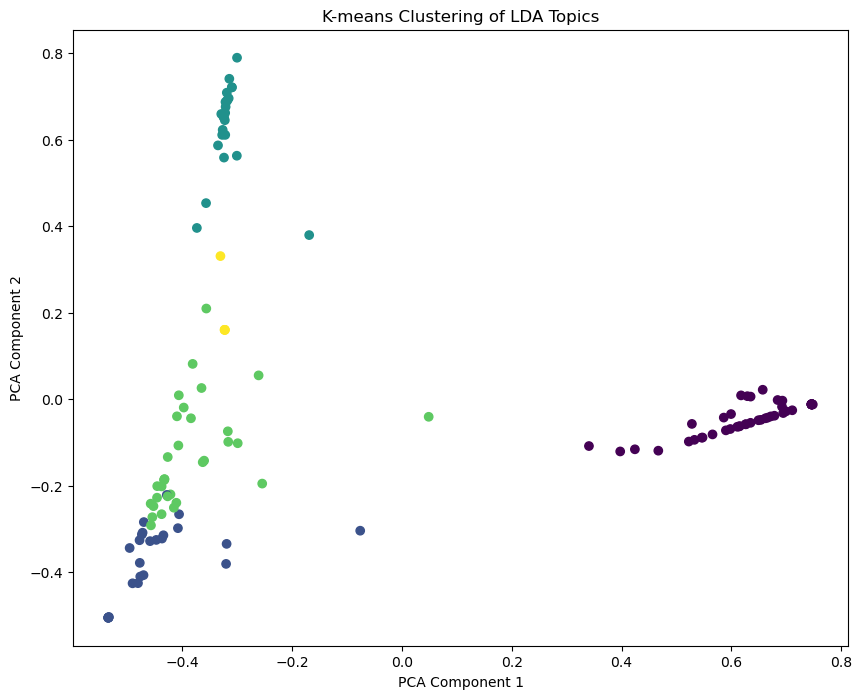

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(doc_topic_matrix)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_clusters)
plt.title("K-means Clustering of LDA Topics")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


**Interpretation:**

*Proximity in the plot suggests thematic similarity. Documents from the same cluster (similar color) likely discuss related topics based on the chosen LDA dimensions.*

*Distance between clusters indicates thematic difference. The further apart clusters are, the less overlap there is between the topics covered by the documents within those clusters.*


*K-means clustering can be very relevant for analyzing government documents on various topics. Here are some ways it can be applied:*

**Grouping Policy Areas:** *By applying K-means to the topic distributions of government documents, you might discover clusters that represent distinct policy areas like education, healthcare, or environmental protection. This can help organize and prioritize documents for further analysis.*

**Identifying Similar Initiatives:**  *K-means can group documents discussing similar government initiatives or programs. This allows you to compare approaches, track progress, or analyze public discourse surrounding specific policy areas.*

*and many more...*

-----------------------------------------------------------------------------------------------------------------

*The code stores the document-topic matrix (lda_topic_matrix) which holds the probability distribution of topics for each document. This allows you to explore how likely each document is to be associated with the various topics identified by LDA.*

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

# Assuming you have a document-term matrix named `count_dt_matrix`
num_topics = 10  # Number of topics you want to extract
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda_topic_matrix = lda_model.fit_transform(count_dt_matrix)


------------------------------------------------------------------------------------------------------


*The code stores the cluster labels for each document in the kmeans_clusters variable. This essentially assigns each document to one of the five clusters identified by K-means.*

In [17]:
from sklearn.cluster import KMeans

# Choose the number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(lda_topic_matrix)


**Things to Remember:**

*Choosing the optimal number of clusters (5 in this case) can be an iterative process. You might need to experiment with different values to find the best fit for your data.*

*K-means doesn't reveal the underlying themes of the clusters. You'll need to analyze the documents assigned to each cluster and the topics associated with those documents to understand what these clusters represent.*

In [18]:
import numpy as np
import pandas as pd

# Create a DataFrame to hold the topic distributions and their assigned clusters
topic_distributions_df = pd.DataFrame(lda_topic_matrix)
topic_distributions_df['cluster'] = kmeans_clusters

# Calculate the average topic distribution for each cluster
average_topic_distributions = topic_distributions_df.groupby('cluster').mean()

# Display the average topic distributions for each cluster
print(average_topic_distributions)


                0         1         2         3         4         5         6  \
cluster                                                                         
0        0.000275  0.006539  0.035272  0.954821  0.000275  0.000275  0.000275   
1        0.000305  0.212701  0.518380  0.045270  0.000224  0.049109  0.000224   
2        0.000109  0.020054  0.050542  0.002460  0.000109  0.000109  0.000109   
3        0.004514  0.047882  0.814552  0.015363  0.009220  0.022808  0.000197   
4        0.000168  0.998487  0.000168  0.000168  0.000168  0.000168  0.000168   

                7         8         9  
cluster                                
0        0.001717  0.000275  0.000275  
1        0.151902  0.000224  0.021662  
2        0.926293  0.000109  0.000109  
3        0.044583  0.000197  0.040685  
4        0.000168  0.000168  0.000168  


In [19]:
# Get the feature names (words) from the CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()

# Function to get top n words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

top_words = get_top_words(lda_model, feature_names, 10)

# Display the top words for each topic
for topic, words in top_words.items():
    print(f"Topic {topic}: {', '.join(words)}")


Topic 0: redress, bst, israel, gaza, compensation, adoption, israeli, government, 90s, aside
Topic 1: bst, updated, australia, women, violence, minister, nsw, government, police, health
Topic 2: bst, updated, government, budget, australia, says, australian, minister, new, year
Topic 3: ukraine, russian, russia, ukrainian, region, military, defence, forces, attack, president
Topic 4: jobseekers, providers, provider, bst, interactive, government, israel, dani, gaza, israeli
Topic 5: crawford, vcat, pain, tribunal, symptoms, treatment, function, philippine, patient, medication
Topic 6: bst, gaza, israel, updated, government, israeli, minister, rafah, new, australia
Topic 7: israel, gaza, israeli, bst, aid, rafah, hamas, military, killed, palestinian
Topic 8: bst, gaza, israel, israeli, military, government, rafah, palestinian, hamas, updated
Topic 9: film, bombs, unexploded, islands, marshall, ordnance, queer, trenches, bot, kindness


### *Possible Linkages*

**Cluster 1:** *High values in "bst, updated, australia, women, violence" could be related to a topic on* **domestic violence** *policy updates in Australia.*

**Cluster 2:** *High values in "bst, updated, government, budget" could be related to the* **Australian government budget announcements or updates.**

**Cluster 3:** *High values in "ukraine, russian, russia" could be related to the* **ongoing Russia-Ukraine conflict.**


### **Further Exploration:**

**Investigate Specific Topics:** *If a particular topic is interesting (e.g., "bst" in multiple clusters), we can explore which documents within each cluster have high probabilities for that topic. This can help you identify the specific contexts in which "bst" is discussed within different clusters.*

**Refine Cluster Interpretation:** *By looking at the high-value topics for each cluster and exploring some of the documents within those clusters, we can refine our understanding of the thematic focus of each cluster.*

## INSIGHTS

**Government Priorities:**

*If certain topics consistently appear with high values across multiple clusters, it might suggest a broader government focus on those areas. For instance:*

* *High values for "healthcare" and "environment" across several clusters could indicate a strong emphasis on these issues within the government's agenda.*
  
  
**Policy Areas and Initiatives:**

*
*By linking the dominant topics to specific government domains and exploring the documents within each cluster, we might be able to identify specific policy areas or initiatives they discuss. For example:*

*
*A cluster with high values in "immigration," "refugees," and "border security" topics might group documents related to government policies on immigration or border control.*

**Comparative Analysis:**

*
*We can compare the topic distributions across clusters to see how the thematic focus varies. This can reveal:*


**Differentiation in Government Activities:**

*
*Some clusters might focus on specific areas like education, while others might discuss broader topics like national security.*

**Shifting Priorities over Time:** 

*
*If our data is from different time periods, analyzing cluster topics can reveal changes in government focus over time.*

**Limitations:**

*
*Keeping in mind that K-means clustering doesn't provide inherent meaning to the clusters. We need to interpret them based on the topics associated with each cluster and the documents within them.
The number of clusters (k) can impact the results. Experimenting with different k values might provide more nuanced insights.*


#### Overall, analyzing the average topic distribution per cluster offers a valuable technique to explore the thematic landscape of our government documents. By linking the topics to government domains and delving deeper into the documents within each cluster, we can gain a richer understanding of the government's areas of focus, policy priorities, and the range of topics discussed in these documents.

# 